In [1]:
import os
import pandas as pd
import numpy as np
import torch

c:\Users\Lucas P\test\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
src = os.getcwd() + "/data/SMD/labels/machine-1-1.txt"
src2 = os.getcwd() + "/data/SMD/test/machine-1-1.txt"
data = pd.read_csv(src, names=['anomaly'])
labels = np.load(os.getcwd() + "/labelsFinal.npy") 
thresholds = np.load(os.getcwd() + "/thresholds.npy")
thresholds_sg = np.load(os.getcwd() + "/thresholds_sg.npy")

In [11]:
test = pd.read_csv(src2)

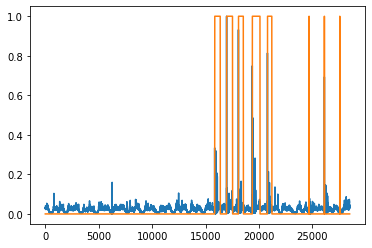

In [30]:
import matplotlib.pyplot as plt
plt.plot(test.iloc[:,8])
plt.plot(labels)

plt.show()

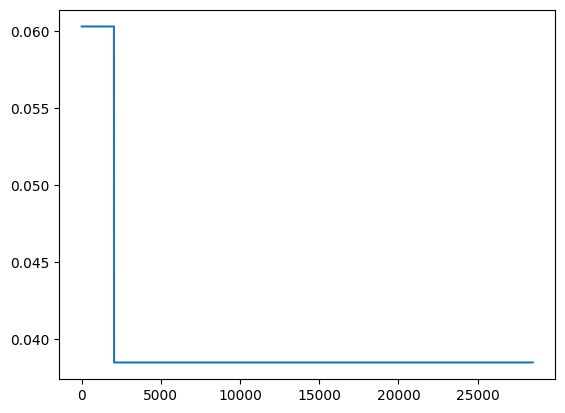

In [5]:
import matplotlib.pyplot as plt
plt.plot(thresholds)
plt.show()

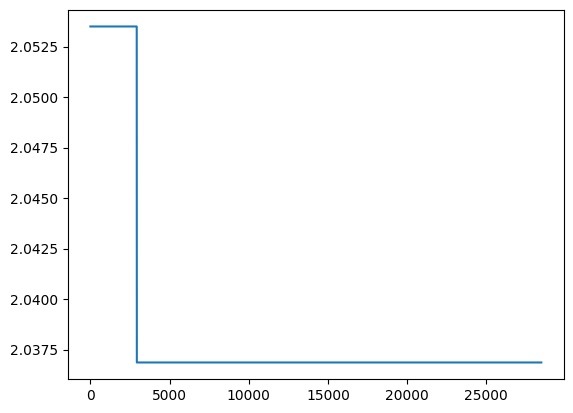

2.038570772408271

In [21]:
plt.plot(thresholds_sg)
plt.show()
np.mean(thresholds_sg)*1.0


In [3]:
labels = pd.DataFrame(labels)
labels.columns = ['anomaly']

In [4]:
labels[labels['anomaly']>0]

,anomaly
15848,1
15849,1
15850,1
15851,1
15852,1
...,...
24680,1
26113,1
26114,1
27553,1


In [9]:
data[data['anomaly']>0]

,anomaly
15849,1
15850,1
15851,1
15852,1
15853,1
...,...
24681,1
26114,1
26115,1
27554,1


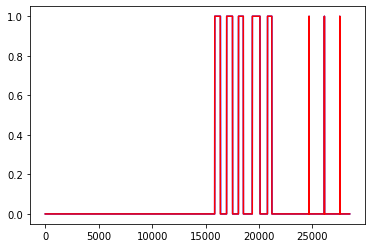

In [8]:
import matplotlib.pyplot as plt
plt.plot(data, c='b')
plt.plot(labels, c='r')
plt.show()

In [3]:
trainO = torch.load('trainO.pt')
trainD = torch.load('trainD.pt')

In [48]:
trainD[100][38*36:38*37]


tensor([6.4516e-02, 3.9195e-02, 4.1249e-02, 4.2973e-02, 0.0000e+00, 9.2308e-01,
        2.8908e-01, 0.0000e+00, 9.6510e-03, 1.2200e-04, 1.8168e-01, 8.1081e-02,
        2.7397e-02, 2.9420e-02, 5.2517e-02, 1.9572e-01, 0.0000e+00, 0.0000e+00,
        8.8820e-02, 5.9739e-02, 6.2375e-02, 4.5691e-02, 6.4817e-01, 1.2660e-02,
        1.6442e-02, 1.1499e-02, 0.0000e+00, 5.2228e-02, 0.0000e+00, 4.2980e-03,
        4.2860e-02, 3.2939e-02, 0.0000e+00, 1.1000e-05, 4.9591e-02, 4.9587e-02,
        0.0000e+00, 0.0000e+00], dtype=torch.float64)

In [49]:
trainO[100]

tensor([5.3763e-02, 4.4492e-02, 3.6789e-02, 4.0650e-02, 0.0000e+00, 9.1795e-01,
        2.9002e-01, 0.0000e+00, 1.2773e-02, 1.2200e-04, 2.2484e-01, 1.0811e-01,
        2.7397e-02, 3.2347e-02, 6.7975e-02, 2.3917e-01, 0.0000e+00, 0.0000e+00,
        6.7604e-02, 5.7959e-02, 5.7151e-02, 4.3025e-02, 6.3518e-01, 1.1186e-02,
        1.5393e-02, 1.0257e-02, 0.0000e+00, 4.8367e-02, 0.0000e+00, 4.2980e-03,
        4.0604e-02, 3.2939e-02, 3.8600e-04, 3.4000e-05, 4.8795e-02, 4.8791e-02,
        0.0000e+00, 0.0000e+00], dtype=torch.float64)

In [3]:
lm_d = {
		'SMD': [(0.99995, 1.04), (0.99995, 1.06)],
		'synthetic': [(0.999, 1), (0.999, 1)],
		'SWaT': [(0.993, 1), (0.993, 1)],
		'UCR': [(0.993, 1), (0.99935, 1)],
		'NAB': [(0.991, 1), (0.99, 1)],
		'SMAP': [(0.98, 1), (0.98, 1)],
		'MSL': [(0.97, 1), (0.999, 1.04)],
		'WADI': [(0.99, 1), (0.999, 1)],
		'MSDS': [(0.91, 1), (0.9, 1.04)],
		'MBA': [(0.87, 1), (0.93, 1.04)],
	}
lm = lm_d['SMD'][0]

In [4]:
lm

(0.99995, 1.04)